# 1. Data Pre-processing

# Import library

In [239]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.6/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.4/124.9 MB 4.1 MB/s eta 0:00:31
   - -------------------------------------- 3.1/124.9 MB 4.0 MB/s eta 0:00:31
   - -------------------------------------- 3.9/124.9 MB 4.0 MB/s eta 0:00:31
   - -------------------------------------- 4.7/124.9 MB 4.0 MB/s eta 0:00:31
   - -------------------------------------- 5.5/124.9 MB 3.9 MB/s eta 0:00:31
   -- ------------------------------------- 6.3/124.9 MB 3.9 MB/s eta 0:00:31
   -- ------------------------------------- 7.1/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 7.9/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 8.7/124.9 MB 3.9 MB/s eta 0:00:30
   --- ------------------------------------ 9.4/124.9 MB 3.9 MB/s eta 0

In [243]:
%pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=3df9b02b389b084dd004b7febff3a177047b4f424359f466ce5b96ade0a59a87
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import pydotplus

# Import data

In [284]:
#Import data
data = pd.read_csv('D:/MASTER DEGREE/01. LATROBE MATERIALS/SEM 3/BUS5PR1 - AI & HYPERAUTOMATION/Assignment 3 - Capstone Project/train.csv')
data_test = pd.read_csv('D:/MASTER DEGREE/01. LATROBE MATERIALS/SEM 3/BUS5PR1 - AI & HYPERAUTOMATION/Assignment 3 - Capstone Project/test.csv')
#Show first 5 rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,admin.,divorced,university.degree,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no
1,33,technician,divorced,high.school,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,75,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,yes
3,35,technician,married,professional.course,no,yes,yes,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no
4,42,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [286]:
data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,27,services,single,university.degree,no,yes,no,cellular,apr,thu,297,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1
1,31,self-employed,divorced,basic.9y,no,yes,no,cellular,may,fri,12,10,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1
2,34,unemployed,married,basic.9y,no,yes,no,cellular,may,thu,218,4,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
3,49,admin.,divorced,high.school,no,no,no,telephone,may,thu,136,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
4,29,admin.,married,unknown,no,unknown,unknown,telephone,jun,fri,83,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1


In [292]:
print('Train Shape (rows, columns):', data.shape)
print('Test Shape (rows, columns):', data_test.shape)

Train Shape (rows, columns): (39188, 21)
Test Shape (rows, columns): (2000, 20)


# Data Exploration

In [88]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [295]:
data_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [297]:
#number of unique values
for col in data.columns:
    print(col, data[col].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1525
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [299]:
#Data structure
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             39188 non-null  object 
 2   marital         39188 non-null  object 
 3   education       39188 non-null  object 
 4   default         39188 non-null  object 
 5   housing         39188 non-null  object 
 6   loan            39188 non-null  object 
 7   contact         39188 non-null  object 
 8   month           39188 non-null  object 
 9   day_of_week     39188 non-null  object 
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  object 
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

# Fix categorical data type

In [301]:
#assign as categorical data
data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['month'] = data['month'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')

#check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             39188 non-null  int64   
 1   job             39188 non-null  category
 2   marital         39188 non-null  category
 3   education       39188 non-null  category
 4   default         39188 non-null  category
 5   housing         39188 non-null  category
 6   loan            39188 non-null  category
 7   contact         39188 non-null  category
 8   month           39188 non-null  category
 9   day_of_week     39188 non-null  category
 10  duration        39188 non-null  int64   
 11  campaign        39188 non-null  int64   
 12  pdays           39188 non-null  int64   
 13  previous        39188 non-null  int64   
 14  poutcome        39188 non-null  category
 15  emp.var.rate    39188 non-null  float64 
 16  cons.price.idx  39188 non-null  float64 
 17  cons.conf.id

In [303]:
#assign as categorical data for test data
data_test['job'] = data_test['job'].astype('category')
data_test['marital'] = data_test['marital'].astype('category')
data_test['education'] = data_test['education'].astype('category')
data_test['default'] = data_test['default'].astype('category')
data_test['housing'] = data_test['housing'].astype('category')
data_test['loan'] = data_test['loan'].astype('category')
data_test['contact'] = data_test['contact'].astype('category')
data_test['month'] = data_test['month'].astype('category')
data_test['day_of_week'] = data_test['day_of_week'].astype('category')
data_test['poutcome'] = data_test['poutcome'].astype('category')

#check data type
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             2000 non-null   int64   
 1   job             2000 non-null   category
 2   marital         2000 non-null   category
 3   education       2000 non-null   category
 4   default         2000 non-null   category
 5   housing         2000 non-null   category
 6   loan            2000 non-null   category
 7   contact         2000 non-null   category
 8   month           2000 non-null   category
 9   day_of_week     2000 non-null   category
 10  duration        2000 non-null   int64   
 11  campaign        2000 non-null   int64   
 12  pdays           2000 non-null   int64   
 13  previous        2000 non-null   int64   
 14  poutcome        2000 non-null   category
 15  emp.var.rate    2000 non-null   float64 
 16  cons.price.idx  2000 non-null   float64 
 17  cons.conf.idx 

# Check Missing Values

In [305]:
#Find missing data
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [307]:
data_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [24]:
# There are no missing values in the training data and testing data at the current statge
# There are text values in some columns, which neeed to be converted into numerical data later.

In [309]:
#Scanning numerical variables
data.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000
mean,40.014035,258.571042,2.563616,962.790701,0.172834,0.081612,93.575678,-40.502475,3.620645,5167.016036
std,10.423559,259.504288,2.756797,186.132903,0.494758,1.571092,0.578853,4.628635,1.734808,72.264621
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [311]:
# Scanning categorical variables
data.describe(include = 'category')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,39188,39188,39188,39188,39188,39188,39188,39188,39188,39188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,9890,23705,11543,30985,20543,32292,24867,13086,8202,33840


# Check Distribution of Target Variable

In [98]:
target_distribution = data['y'].value_counts(normalize=True)
print("Target variable distribution:\n", target_distribution)

Target variable distribution:
 y
no     0.886955
yes    0.113045
Name: proportion, dtype: float64


In [49]:
#88.7% of the target variable's values are "no," meaning that most of the observations in the dataset did not subscrib to term deposit
#11.3% of the target variable's values are "yes," meaning that a smaller portion of observations did subscribe.
# The dataset is imbalanced, with significantly more "no" values compared to "yes" values.

# Data Visualization

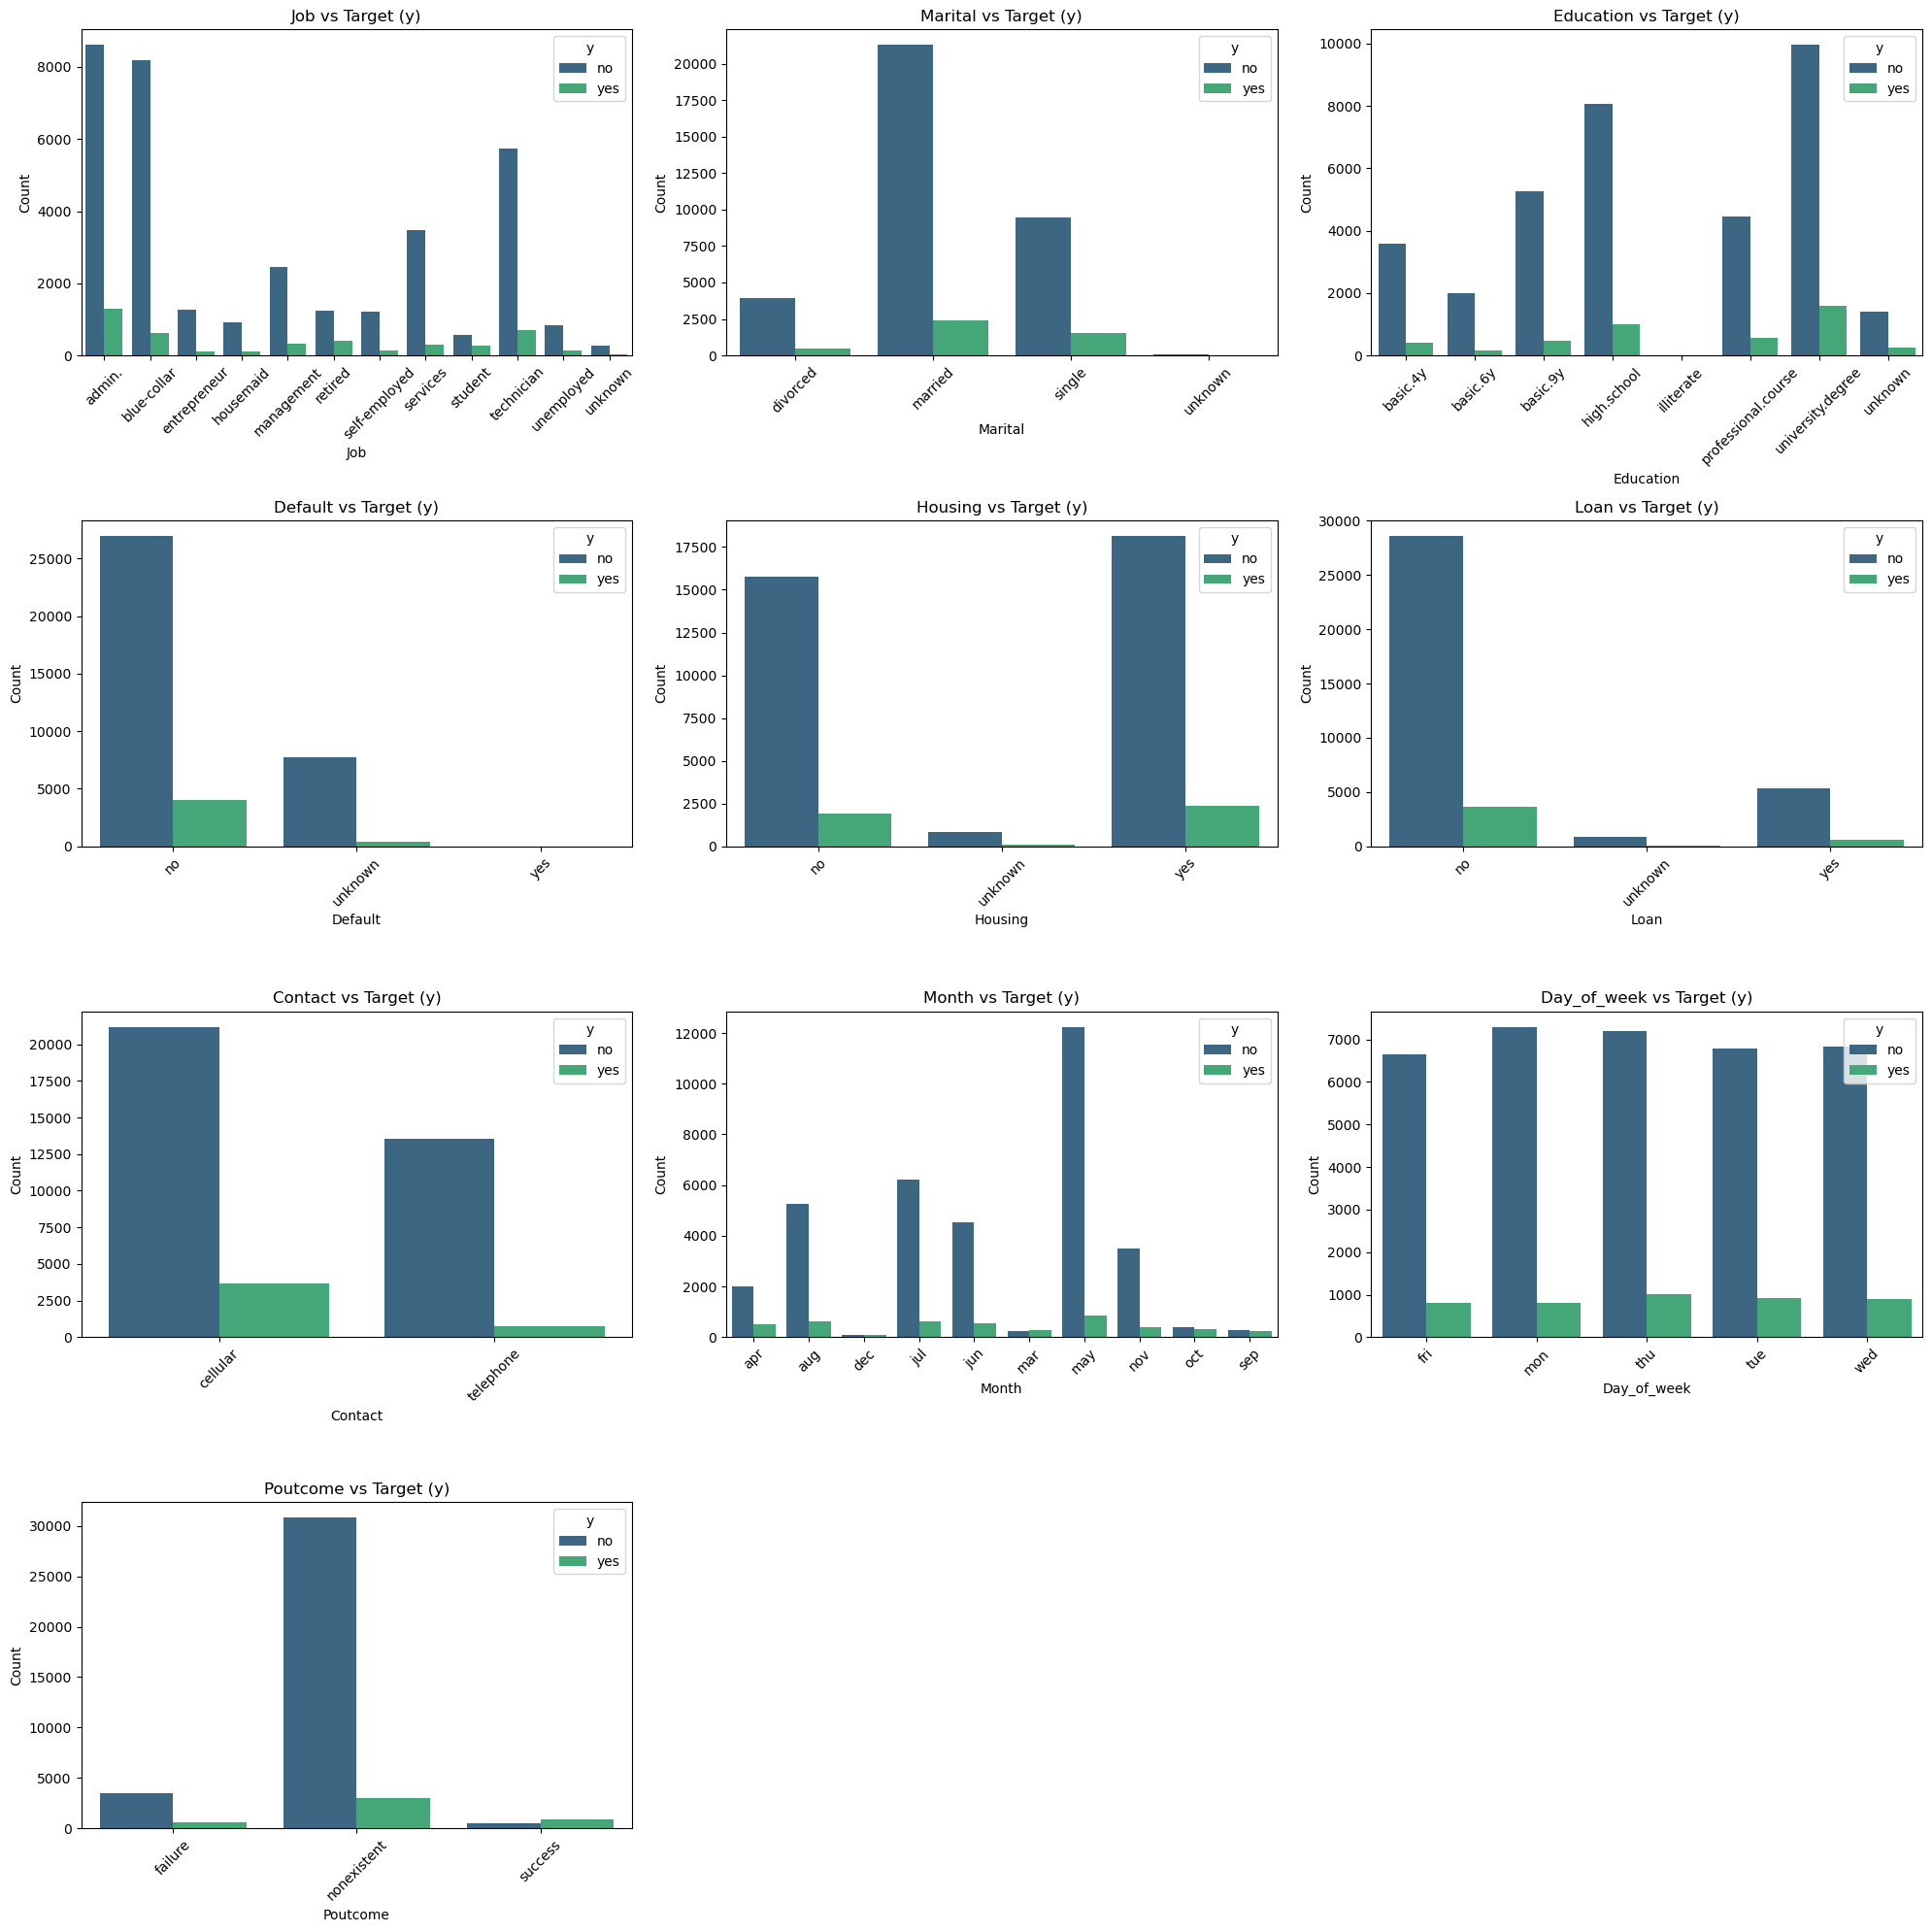

In [314]:
# Load your data (assuming 'data' DataFrame is already prepared)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Set up the figure size for the plots
plt.figure(figsize=(20, 20))

# Loop through the categorical columns to create subplots
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)  # Adjust the subplot grid (4 rows x 3 columns for your 10 features)
    sns.countplot(data=data, x=col, hue='y', palette='viridis')
    plt.title(f'{col.capitalize()} vs Target (y)')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [104]:
# Insights:

#Jobs such as management and student show a relatively higher proportion of yes (subscriptions) compared to other categories. 

#The single category seems to have a relatively higher proportion of yes responses than married or divorced, 
#suggesting that single individuals might be more inclined to subscribe.

#The university.degree and professional.course categories show more yes responses than others, 
#indicating that higher education levels may be associated with a greater likelihood of subscription.

#Customers who have yes for default are very few and show almost no subscriptions

#Customers without a housing loan (no) may be more likely to subscribe compared to those with one.

# The yes category for personal loans shows very few yes responses, suggesting that having a personal loan is negatively associated with subscribing.

#The cellular contact type shows more yes responses proportionally than telephone, 
#indicating that contacting customers via cellular may be more effective for subscriptions.

#Months like mar, apr, and dec seem to have higher proportions of yes responses, indicating potential seasonality or effective campaign periods

#The success category, although much smaller in count, shows a significant proportion of yes responses, 
#indicating that a positive outcome in a previous campaign is strongly correlated with a higher likelihood of subscription.

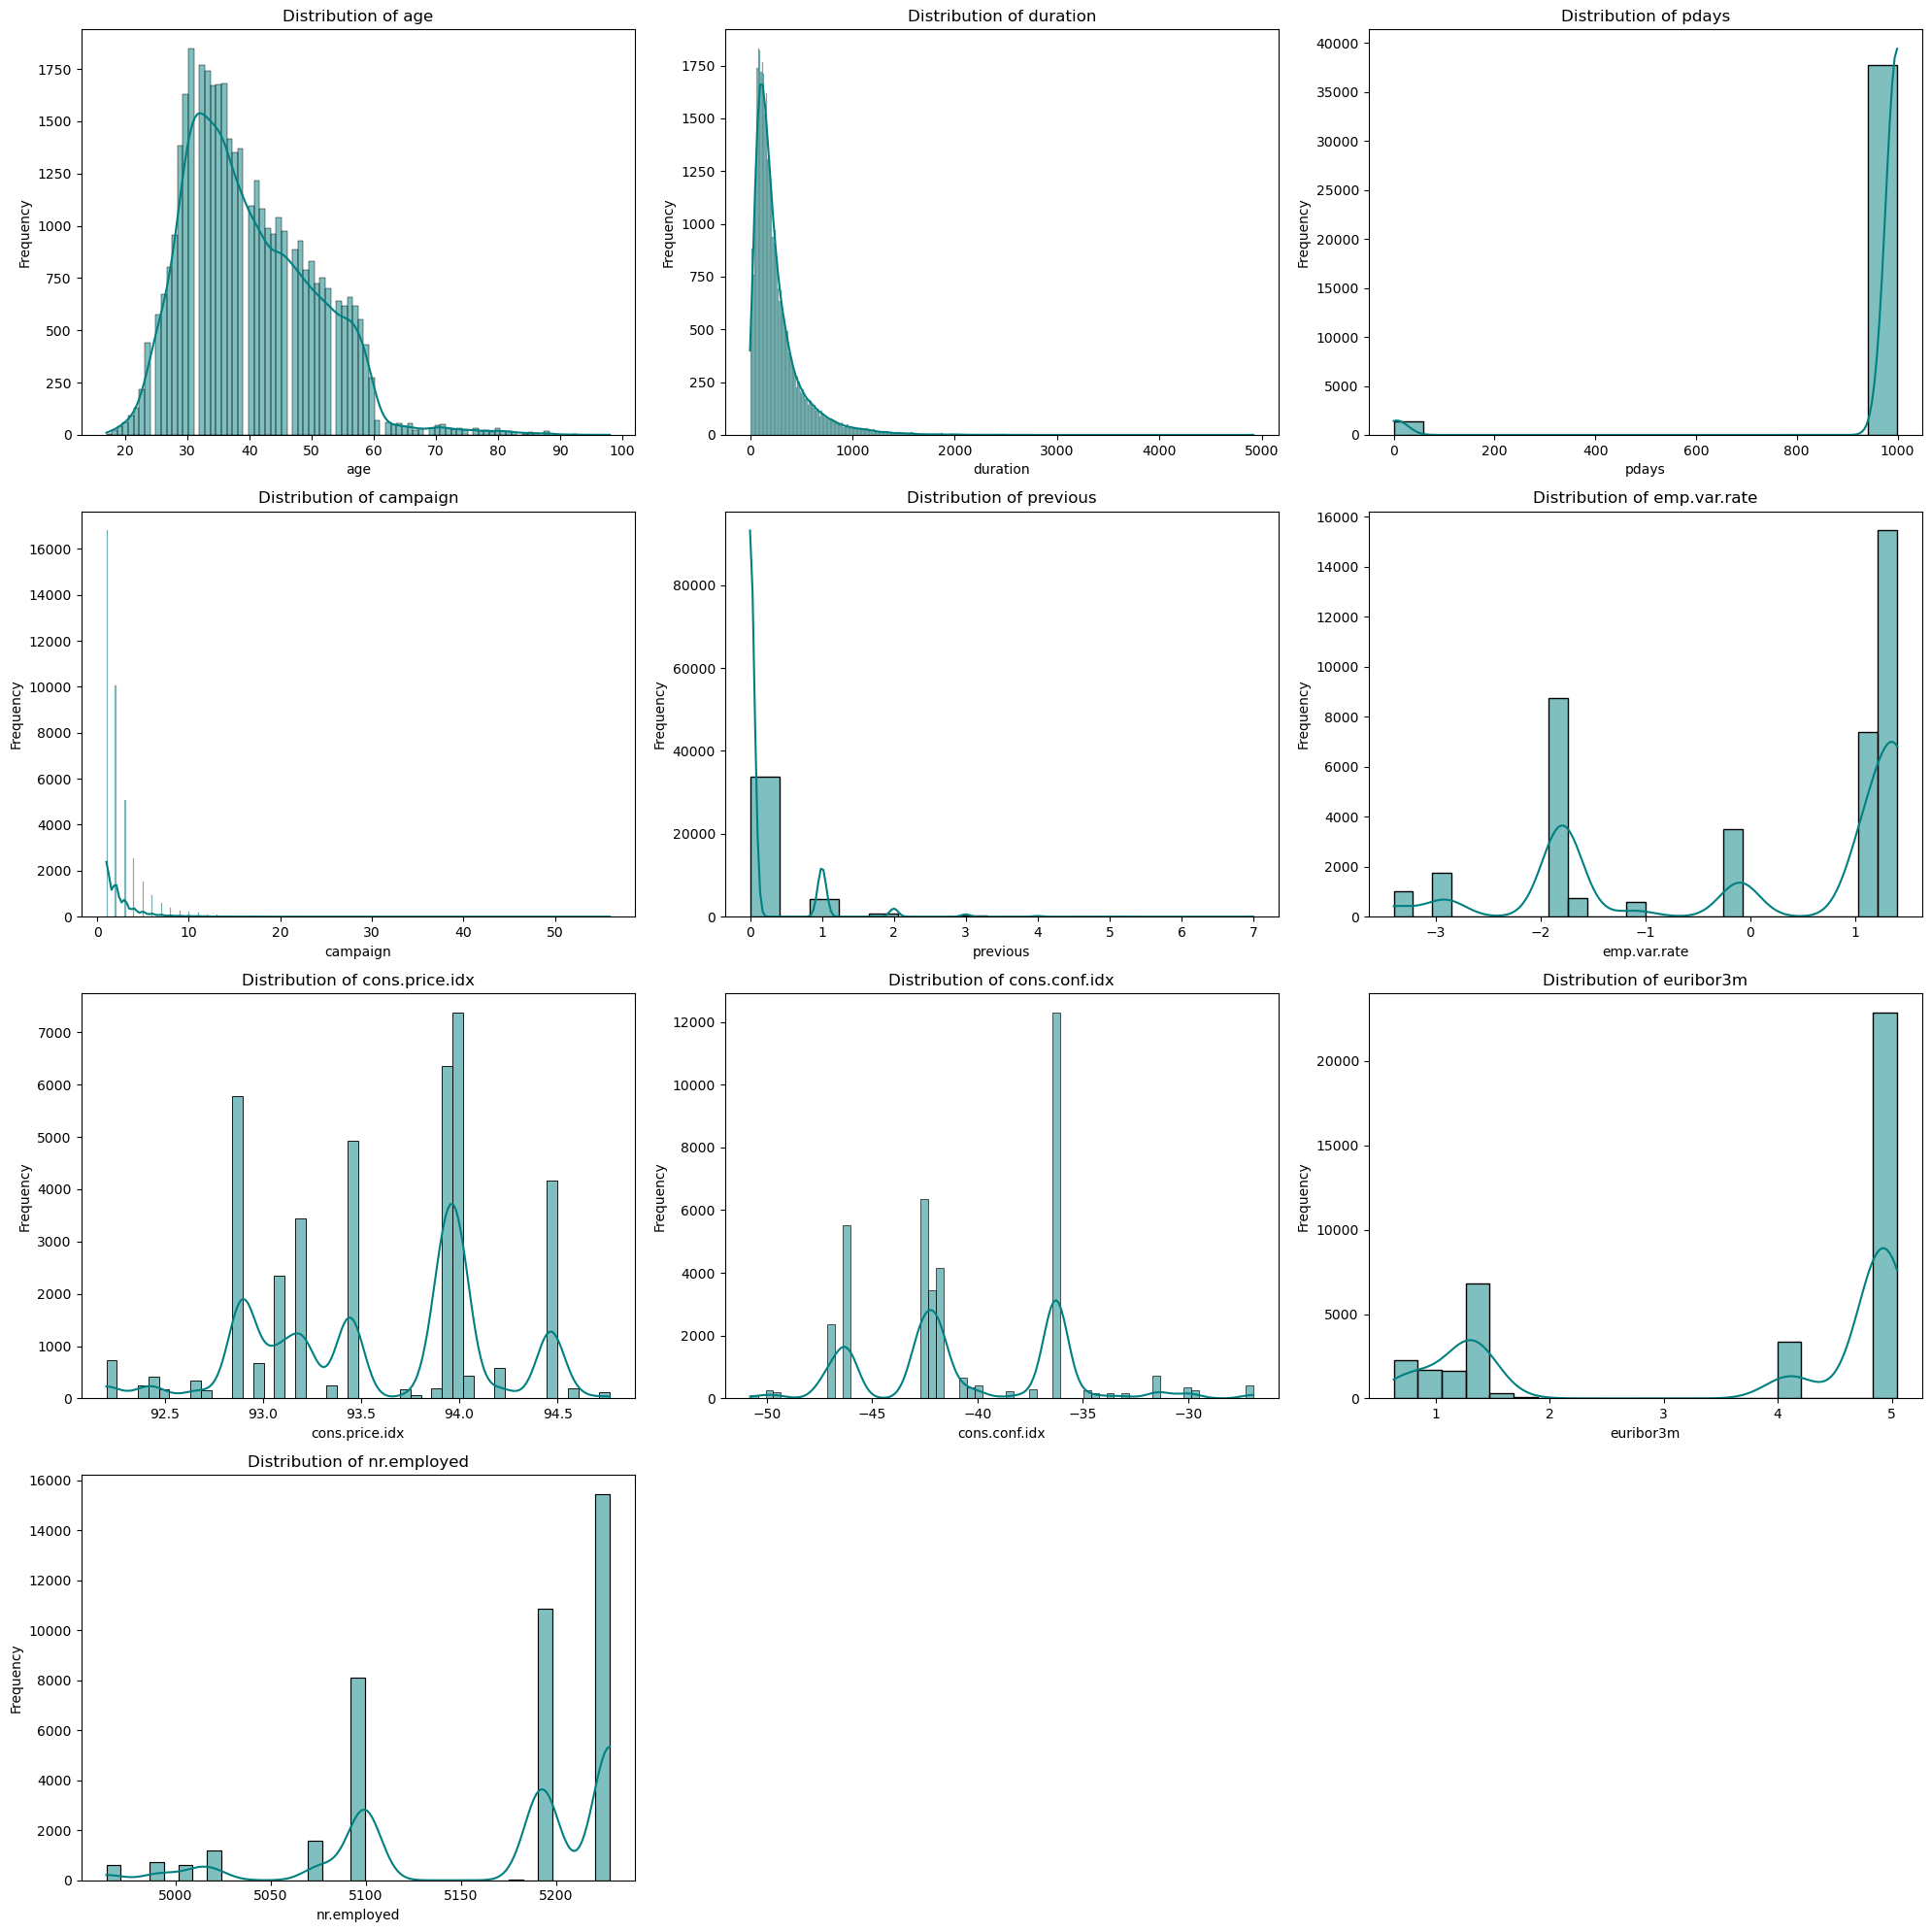

In [316]:
# List of numerical features in the dataset
numerical_features = ['age', 'duration', 'pdays','campaign', 'previous', 'emp.var.rate', 
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Set up the figure size for the plots
plt.figure(figsize=(20, 20))

# Loop through the numerical features to create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)  # Adjust the subplot grid to 4 rows and 3 columns to fit 10 plots
    sns.histplot(data[feature], kde=True, color='teal')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
#The distribution of age is right-skewed, with most customers falling in the 30-50 age range.

#The duration feature is highly right-skewed, with most call durations being very short (close to 0) and a few being much longer.

#The pdays (number of days since the client was last contacted from a previous campaign) distribution shows a spike at the high end (near 1000). 
#This likely represents cases where the client was not contacted previously (ategorizing 999 as "not contacted before")

#The distribution of campaign (number of contacts performed during this campaign) is highly right-skewed, 
#with most values clustering at the low end (close to 1) and very few customers being contacted many times.

#The emp.var.rate distribution has distinct peaks and valleys, 
#indicating it may be influenced by certain economic conditions at the time of contact.

#Features like euribor3m and nr.employed have strong peaks at specific values, 
#suggesting that many observations are concentrated within narrow ranges

#Multi-Modal Distributions: Several features, such as cons.price.idx and cons.conf.idx, show multi-modal behavior, 
#which could indicate different economic phases within the data

# Handle Categorical Variables with Label Encoding

In [318]:
# List of categorical columns to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply integer encoding for each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the label encoder for future reference if needed

# Print the data to check the encoded columns
print(data.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   48    0        0          6        0        2     0        0      7   
1   33    9        0          3        0        0     0        0      7   
2   75    5        0          0        1        2     0        0      8   
3   35    9        1          5        0        2     2        0      6   
4   42    0        0          6        0        2     0        0      1   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         3    999         1         0          -0.1   
1            3  ...         1    999         0         1          -0.1   
2            2  ...         1    999         0         1          -3.4   
3            4  ...         1    999         1         0          -1.8   
4            1  ...         5    999         0         1           1.4   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
0          93.200          -42.0      4.

In [320]:
for col, le in label_encoders.items():
    print(f"Mapping for '{col}':")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(mapping)
    print()

Mapping for 'job':
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}

Mapping for 'marital':
{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

Mapping for 'education':
{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}

Mapping for 'default':
{'no': 0, 'unknown': 1, 'yes': 2}

Mapping for 'housing':
{'no': 0, 'unknown': 1, 'yes': 2}

Mapping for 'loan':
{'no': 0, 'unknown': 1, 'yes': 2}

Mapping for 'contact':
{'cellular': 0, 'telephone': 1}

Mapping for 'month':
{'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}

Mapping for 'day_of_week':
{'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}

Mapping for 'poutcome':
{'failure': 0, 'nonexistent': 1, 'success': 2}



In [322]:
# Apply the existing label encoder from the training data to the test data
for col in categorical_columns:
    data_test[col] = label_encoders[col].transform(data_test[col])

# Print the test data to check the encoded columns
print(data_test.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   27    7        2          6        0        2     0        0      0   
1   31    6        0          2        0        2     0        0      6   
2   34   10        1          2        0        2     0        0      6   
3   49    0        0          3        0        0     0        1      6   
4   29    0        1          7        0        1     1        1      4   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            2       297         1    999         0         1          -1.8   
1            0        12        10    999         1         0          -1.8   
2            2       218         4    999         0         1          -1.8   
3            2       136         3    999         0         1           1.1   
4            0        83         3    999         0         1           1.4   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.0

In [324]:
# Check the mapping for each categorical column in the test data
for col, le in label_encoders.items():
    print(f"Mapping for '{col}' in test data:")
    test_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(test_mapping)
    print()

# Print the first few rows of the test data to confirm the applied transformations
print(data_test.head())

Mapping for 'job' in test data:
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}

Mapping for 'marital' in test data:
{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

Mapping for 'education' in test data:
{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}

Mapping for 'default' in test data:
{'no': 0, 'unknown': 1, 'yes': 2}

Mapping for 'housing' in test data:
{'no': 0, 'unknown': 1, 'yes': 2}

Mapping for 'loan' in test data:
{'no': 0, 'unknown': 1, 'yes': 2}

Mapping for 'contact' in test data:
{'cellular': 0, 'telephone': 1}

Mapping for 'month' in test data:
{'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}

Mapping for 'day_of_week' in test data:
{'fri': 0, 'mon': 1, 'thu': 2, 'tue':

In [326]:
# Convert the target variable 'y' to binary (1 for 'yes', 0 for 'no')
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [140]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_duration_minutes,short_call_indicator
0,48,0,0,6,0,2,0,0,7,0,...,1,0,-0.1,93.200,-42.0,4.021,5195.8,0,1.600000,0
1,33,9,0,3,0,0,0,0,7,3,...,0,1,-0.1,93.200,-42.0,4.153,5195.8,0,1.166667,0
2,75,5,0,0,1,2,0,0,8,2,...,0,1,-3.4,92.431,-26.9,0.754,5017.5,1,8.366667,0
3,35,9,1,5,0,2,2,0,6,4,...,1,0,-1.8,92.893,-46.2,1.334,5099.1,0,2.283333,0
4,42,0,0,6,0,2,0,0,1,1,...,0,1,1.4,93.444,-36.1,4.965,5228.1,0,1.516667,0


# Feature Engineering

In [328]:
# Time-Based Features
data['call_duration_minutes'] = data['duration'] / 60  # Convert duration from seconds to minutes
data['short_call_indicator'] = data['duration'].apply(lambda x: 1 if x < 60 else 0)  # Short call indicator

In [330]:
# Create a feature to indicate if the previous outcome was a success (poutcome == 2)
data['previous_success'] = data['poutcome'].apply(lambda x: 1 if x == 2 else 0)

# Create a feature to indicate if the customer has any personal financial obligations
# Check if any of the integer-encoded columns have a value of 2 (indicating 'yes')
data['has_personal_financial_obligations'] = data[['default', 'housing', 'loan']].apply(lambda row: 1 if (row == 2).any() else 0, axis=1)

# Create a feature to indicate if the customer is new (pdays == 999)
data['new_customer'] = data['pdays'].apply(lambda x: 1 if x == 999 else 0)

# Print a preview of the updated data
print(data.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   48    0        0          6        0        2     0        0      7   
1   33    9        0          3        0        0     0        0      7   
2   75    5        0          0        1        2     0        0      8   
3   35    9        1          5        0        2     2        0      6   
4   42    0        0          6        0        2     0        0      1   

   day_of_week  ...  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  \
0            0  ...          93.200          -42.0      4.021       5195.8  0   
1            3  ...          93.200          -42.0      4.153       5195.8  0   
2            2  ...          92.431          -26.9      0.754       5017.5  1   
3            4  ...          92.893          -46.2      1.334       5099.1  0   
4            1  ...          93.444          -36.1      4.965       5228.1  0   

   call_duration_minutes  short_call_indicator  previous_succe

In [332]:
# Apply the same time-based feature engineering to the test dataset
data_test['call_duration_minutes'] = data_test['duration'] / 60  # Convert duration from seconds to minutes
data_test['short_call_indicator'] = data_test['duration'].apply(lambda x: 1 if x < 60 else 0)  # Short call indicator

# Create a feature to indicate if the previous outcome was a success (poutcome == 2)
data_test['previous_success'] = data_test['poutcome'].apply(lambda x: 1 if x == 2 else 0)

# Create a feature to indicate if the customer has any personal financial obligations
# Check if any of the integer-encoded columns have a value of 2 (indicating 'yes')
data_test['has_personal_financial_obligations'] = data_test[['default', 'housing', 'loan']].apply(lambda row: 1 if (row == 2).any() else 0, axis=1)

# Create a feature to indicate if the customer is new (pdays == 999)
data_test['new_customer'] = data_test['pdays'].apply(lambda x: 1 if x == 999 else 0)

# Print a preview of the updated test data
print(data_test.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   27    7        2          6        0        2     0        0      0   
1   31    6        0          2        0        2     0        0      6   
2   34   10        1          2        0        2     0        0      6   
3   49    0        0          3        0        0     0        1      6   
4   29    0        1          7        0        1     1        1      4   

   day_of_week  ...  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0            2  ...          -1.8          93.075          -47.1      1.410   
1            0  ...          -1.8          92.893          -46.2      1.250   
2            2  ...          -1.8          92.893          -46.2      1.266   
3            2  ...           1.1          93.994          -36.4      4.860   
4            0  ...           1.4          94.465          -41.8      4.959   

   nr.employed  call_duration_minutes  short_call_indicator  previous_succ

# Correlation Matrix

<Axes: >

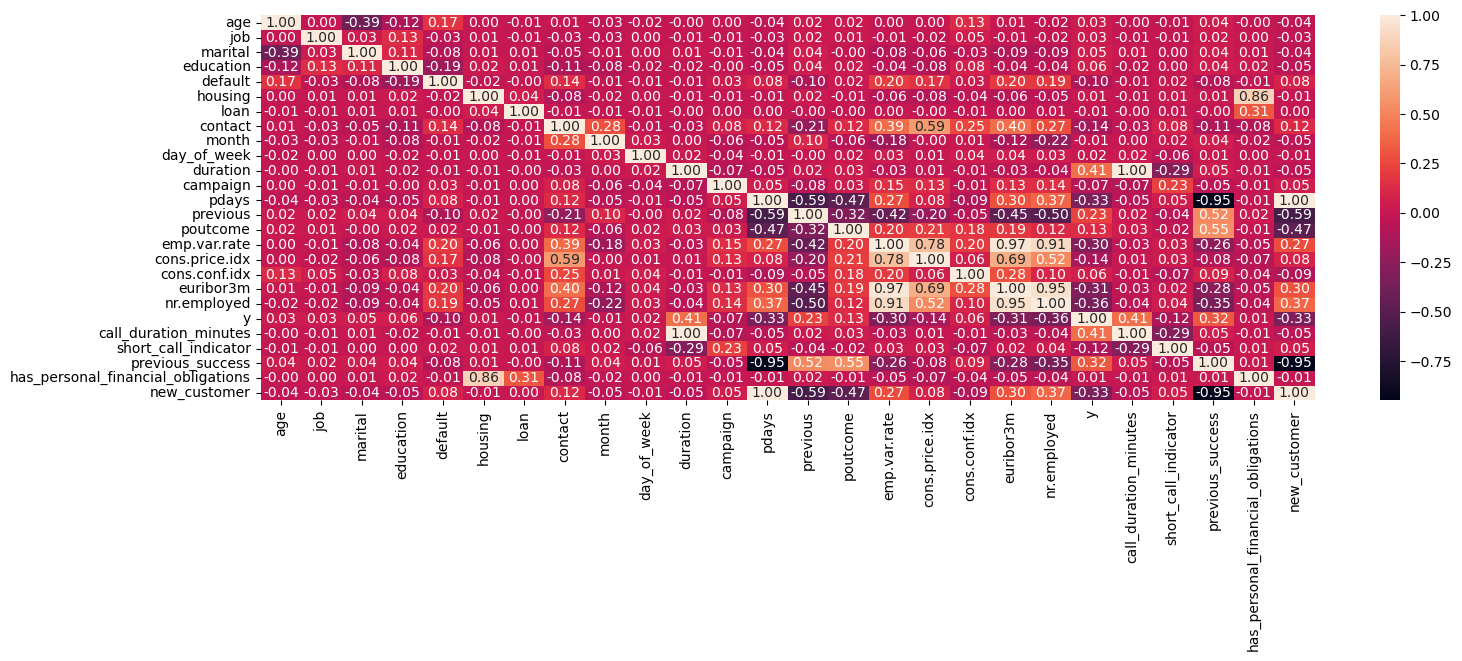

In [335]:
plt.figure(figsize=(17,5))
sns.heatmap(data.corr(), annot=True, fmt = ".2f")

# Skewness Check

In [337]:
# Check skewness for all numerical columns in the data
numerical_features = ['age', 'duration', 'campaign', 'previous', 'pdays', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Calculate skewness for each numerical feature
skewness = data[numerical_features].skew()

# Print skewness values
print("Skewness of Numerical Features:")
print(skewness)

# display features with significant skewness (e.g., > 1 or < -1)
print("\nFeatures with significant skewness (|skewness| > 1):")
print(skewness[abs(skewness) > 1])

Skewness of Numerical Features:
age               0.788733
duration          3.261611
campaign          4.753729
previous          3.831074
pdays            -4.946141
emp.var.rate     -0.723370
cons.price.idx   -0.231037
cons.conf.idx     0.303532
euribor3m        -0.708395
nr.employed      -1.043342
dtype: float64

Features with significant skewness (|skewness| > 1):
duration       3.261611
campaign       4.753729
previous       3.831074
pdays         -4.946141
nr.employed   -1.043342
dtype: float64


In [339]:
# Define the threshold for significant skewness (e.g., > 1 or < -1)
skew_threshold = 1

# List of numerical features to check and potentially transform
numerical_features = ['age', 'duration', 'campaign', 'previous', 'pdays', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Calculate skewness for each numerical feature
skewness = data[numerical_features].skew()

# Identify features with significant skewness
skewed_features = skewness[abs(skewness) > skew_threshold].index

# Apply square root transformation to reduce skewness for identified features
for feature in skewed_features:
    data[feature] = data[feature].apply(lambda x: np.sqrt(x) if x >= 0 else -np.sqrt(-x))

# Print a message indicating which features were transformed
print("Transformed features to reduce skewness:")
print(skewed_features)

# Verify the new skewness after transformation
new_skewness = data[skewed_features].skew()
print("\nNew skewness values after transformation:")
print(new_skewness)

Transformed features to reduce skewness:
Index(['duration', 'campaign', 'previous', 'pdays', 'nr.employed'], dtype='object')

New skewness values after transformation:
duration       1.197980
campaign       2.160841
previous       2.390224
pdays         -4.951343
nr.employed   -1.052990
dtype: float64


In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 39188 non-null  int64  
 1   job                                 39188 non-null  int32  
 2   marital                             39188 non-null  int32  
 3   education                           39188 non-null  int32  
 4   default                             39188 non-null  int32  
 5   housing                             39188 non-null  int32  
 6   loan                                39188 non-null  int32  
 7   contact                             39188 non-null  int32  
 8   month                               39188 non-null  int32  
 9   day_of_week                         39188 non-null  int32  
 10  duration                            39188 non-null  float64
 11  campaign                            39188

# Feature Selection

C:\Users\PC\AppData\Local\Temp\ipykernel_24036\1544664373.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')


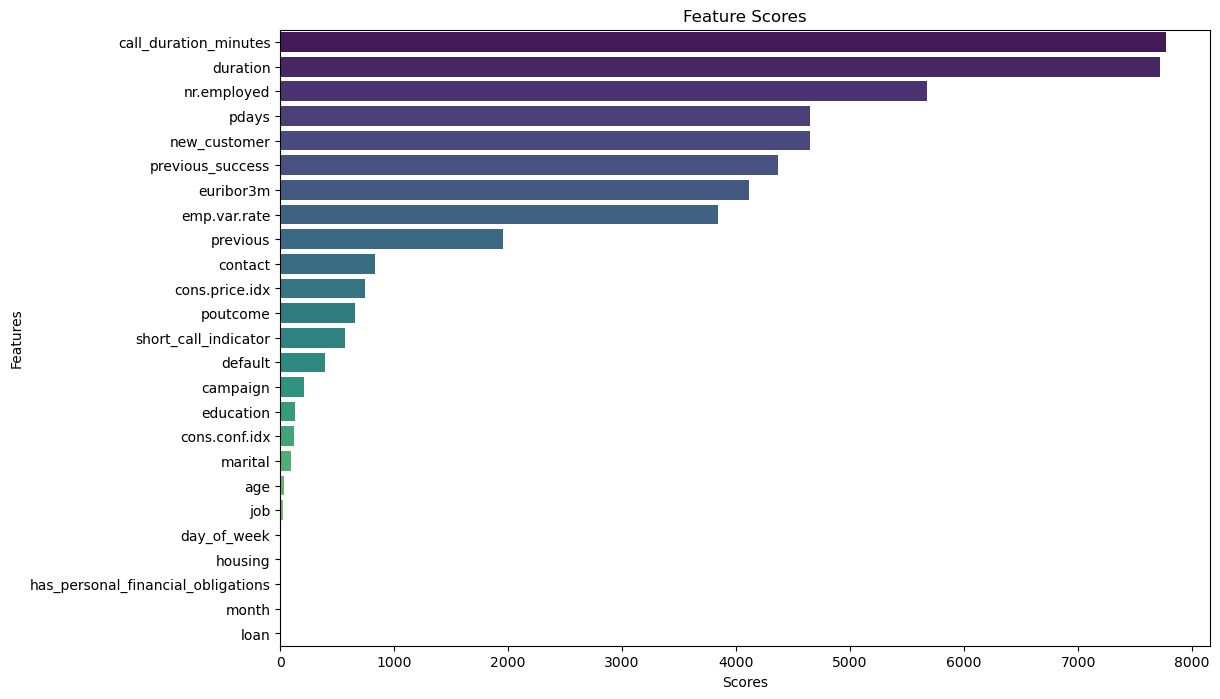

In [343]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'y' is your response variable (target)
df_predictors = data.drop(["y"], axis=1)  # Replace 'y' with the name of your target variable if different
df_response = data["y"]

# Apply SelectKBest for feature selection
selector = SelectKBest(f_classif, k=25)  # As we have 25 features
predictors_selected = selector.fit_transform(df_predictors, df_response)

# Get selected feature names and their scores
selected_features = df_predictors.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

# Removing Unsed Features

In [345]:
# List of columns to drop
drop_features = ['day_of_week', 'housing', 'has_personal_financial_obligations', 'month', 'loan']

# Drop the specified columns from the DataFrame
data = data.drop(drop_features, axis=1)

# Display the first few rows of the modified DataFrame
print(data.head())

   age  job  marital  education  default  contact   duration  campaign  \
0   48    0        0          6        0        0   9.797959  1.732051   
1   33    9        0          3        0        0   8.366600  1.000000   
2   75    5        0          0        1        0  22.405357  1.000000   
3   35    9        1          5        0        0  11.704700  1.000000   
4   42    0        0          6        0        0   9.539392  2.236068   

       pdays  previous  ...  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  31.606961       1.0  ...          -0.1          93.200          -42.0   
1  31.606961       0.0  ...          -0.1          93.200          -42.0   
2  31.606961       0.0  ...          -3.4          92.431          -26.9   
3  31.606961       1.0  ...          -1.8          92.893          -46.2   
4  31.606961       0.0  ...           1.4          93.444          -36.1   

   euribor3m  nr.employed  y  call_duration_minutes  short_call_indicator  \
0      4.021    72.08

In [347]:
# List of columns to drop (same as those dropped from the training data)
drop_features = ['day_of_week', 'housing', 'has_personal_financial_obligations', 'month', 'loan']

# Drop the specified columns from the test DataFrame
data_test = data_test.drop(drop_features, axis=1)

# Display the first few rows of the modified test DataFrame
print(data_test.head())

   age  job  marital  education  default  contact  duration  campaign  pdays  \
0   27    7        2          6        0        0       297         1    999   
1   31    6        0          2        0        0        12        10    999   
2   34   10        1          2        0        0       218         4    999   
3   49    0        0          3        0        1       136         3    999   
4   29    0        1          7        0        1        83         3    999   

   previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0         0         1          -1.8          93.075          -47.1      1.410   
1         1         0          -1.8          92.893          -46.2      1.250   
2         0         1          -1.8          92.893          -46.2      1.266   
3         0         1           1.1          93.994          -36.4      4.860   
4         0         1           1.4          94.465          -41.8      4.959   

   nr.employed  call_duration_mi

# Feature Scaling

In [349]:
# List of columns to scale (numerical features)
scale_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
              'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
              'call_duration_minutes']  

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
data[scale_cols] = scaler.fit_transform(data[scale_cols])

# Display the first few rows of the scaled DataFrame
print(data.head())

        age  job  marital  education  default  contact  duration  campaign  \
0  0.766156    0        0          6        0        0 -0.728579  0.412591   
1 -0.672911    9        0          3        0        0 -0.943886 -0.777938   
2  3.356475    5        0          0        1        0  1.167840 -0.777938   
3 -0.481035    9        1          5        0        0 -0.441765 -0.777938   
4  0.190529    0        0          6        0        0 -0.767473  1.232270   

      pdays  previous  ...  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  0.194473  2.192125  ...     -0.115597       -0.649012      -0.323539   
1  0.194473 -0.387856  ...     -0.115597       -0.649012      -0.323539   
2  0.194473 -0.387856  ...     -2.216073       -1.977517       2.938804   
3  0.194473  2.192125  ...     -1.197661       -1.179378      -1.230946   
4  0.194473 -0.387856  ...      0.839165       -0.227484       0.951151   

   euribor3m  nr.employed  y  call_duration_minutes  short_call_indicator  \
0  

In [351]:
# Transform the selected columns in the test data using the already fitted scaler
data_test[scale_cols] = scaler.transform(data_test[scale_cols])

# Display the first few rows of the scaled test DataFrame
print(data_test.head())

        age  job  marital  education  default  contact   duration   campaign  \
0 -1.248537    7        2          6        0        0  42.472674  -0.777938   
1 -0.864786    6        0          2        0        0  -0.397346  13.858694   
2 -0.576973   10        1          2        0        0  30.589405   4.100940   
3  0.862093    0        0          3        0        1  18.254873   2.474647   
4 -1.056662    0        1          7        0        1  10.282554   2.474647   

        pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
0  176.461701 -0.387856         1     -1.197661       -0.864959   
1  176.461701  2.192125         0     -1.197661       -1.179378   
2  176.461701 -0.387856         1     -1.197661       -1.179378   
3  176.461701 -0.387856         1      0.648212        0.722683   
4  176.461701 -0.387856         1      0.839165        1.536370   

   cons.conf.idx  euribor3m   nr.employed  call_duration_minutes  \
0      -1.425390  -1.274305   9964.178892       

# Data Split

In [353]:
# Define the target variable and predictors
Y = data['y']  
X = data.drop('y', axis=1)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=5)

# Print the shape of the training and validation sets
print('Train Shape (rows, columns):', X_train.shape)
print('Validation Shape (rows, columns):', X_val.shape)

Train Shape (rows, columns): (31350, 20)
Validation Shape (rows, columns): (7838, 20)


# Modeling

# Logistic Regression

In [355]:
reg = LogisticRegression()

In [357]:
reg.fit(X_train, Y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [359]:
Y_predict = reg.predict(X_val)

In [361]:
accuracy = accuracy_score(Y_val, Y_predict)

In [363]:
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 90.65%


In [365]:
print(classification_report(Y_val, Y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6935
           1       0.65      0.41      0.50       903

    accuracy                           0.91      7838
   macro avg       0.79      0.69      0.72      7838
weighted avg       0.89      0.91      0.90      7838



# Decision Tree

In [368]:
clf = DecisionTreeClassifier()

In [370]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [372]:
Y_predict = clf.predict(X_val)

In [374]:
accuracy = accuracy_score(Y_val, Y_predict)

In [376]:
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 87.99%


In [378]:
print(classification_report(Y_val, Y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6935
           1       0.48      0.51      0.49       903

    accuracy                           0.88      7838
   macro avg       0.71      0.72      0.71      7838
weighted avg       0.88      0.88      0.88      7838



# Neural Network

In [381]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000)

In [383]:
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=20, max_iter=1000)

In [385]:
Y_predict = mlp.predict(X_val)

In [387]:
accuracy = accuracy_score(Y_val, Y_predict)

In [389]:
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 90.43%


In [391]:
print(classification_report(Y_val, Y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6935
           1       0.59      0.54      0.56       903

    accuracy                           0.90      7838
   macro avg       0.77      0.75      0.76      7838
weighted avg       0.90      0.90      0.90      7838



# Model Comparision

In [398]:
seed = 2024

models = [
    MLPClassifier(hidden_layer_sizes=(20), max_iter=1000),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
     
]

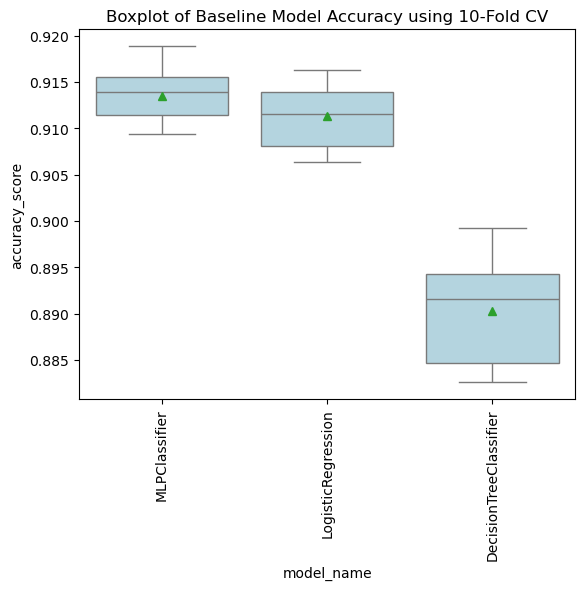

,Mean,Standard Deviation
model_name,,
MLPClassifier,0.913519,0.003050
LogisticRegression,0.911274,0.003509
DecisionTreeClassifier,0.890221,0.006019


In [400]:
def generate_baseline_results(models, X, y, metrics, cv=10, plot_results=False):
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data = cv_df, color='lightblue', showmeans=True)
        plt.title('Boxplot of Baseline Model Accuracy using 10-Fold CV')
        plt.xticks(rotation=90)
        plt.show()
        
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
        
    return baseline_results

generate_baseline_results(models, X, Y, metrics='accuracy', cv=10, plot_results=True)

# Model Evaluation Results

1. Model Performance Summary:
MLPClassifier has the highest mean accuracy of approximately 0.9135 with a standard deviation of 0.00305.
LogisticRegression follows with a mean accuracy of around 0.9113 and a standard deviation of 0.00351.
DecisionTreeClassifier shows the lowest performance among the models with a mean accuracy of 0.8902 and a higher standard deviation of 0.00602.

3. Interpretation of the Boxplot:
The boxplot provides a visual summary of model performance across 10-fold cross-validation:
The green triangle represents the mean accuracy for each model.
The whiskers show the variability in accuracy scores across the different folds.
Outliers (if any) are represented by dots outside the whiskers.
The MLPClassifier and LogisticRegression both show narrow whiskers, indicating low variability and consistent performance across the folds.
The DecisionTreeClassifier has a wider spread, suggesting more variability in performance and potentially less stability.


5. Mean and Standard Deviation Analysis:
Mean Accuracy:
The mean accuracy indicates the average performance of each model across the cross-validation folds.
MLPClassifier has the highest mean accuracy, indicating that it is potentially the most reliable model for this dataset.
Standard Deviation:
The standard deviation represents the variability in model performance across the folds.
MLPClassifier and LogisticRegression have relatively low standard deviations, suggesting they provide stable predictions.
DecisionTreeClassifier has a higher standard deviation, indicating more inconsistency in its performance across the folds.
6. Recommendations:

7. 
MLPClassifier is the best-performing model based on these metrics and could be a strong candidate for further deployment.

# Explainable AI

In [406]:
!pip install shap

In [408]:
!pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283840 sha256=fffe6c7f97615a299a279f4bf0f521135363be468a0f6a60d17216b6d229637c
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [410]:
import shap

In [412]:
explainer = shap.Explainer(mlp.predict, X_train)

In [414]:
shap_values = explainer(X_train)

PermutationExplainer explainer: 31351it [12:05, 42.90it/s]                           


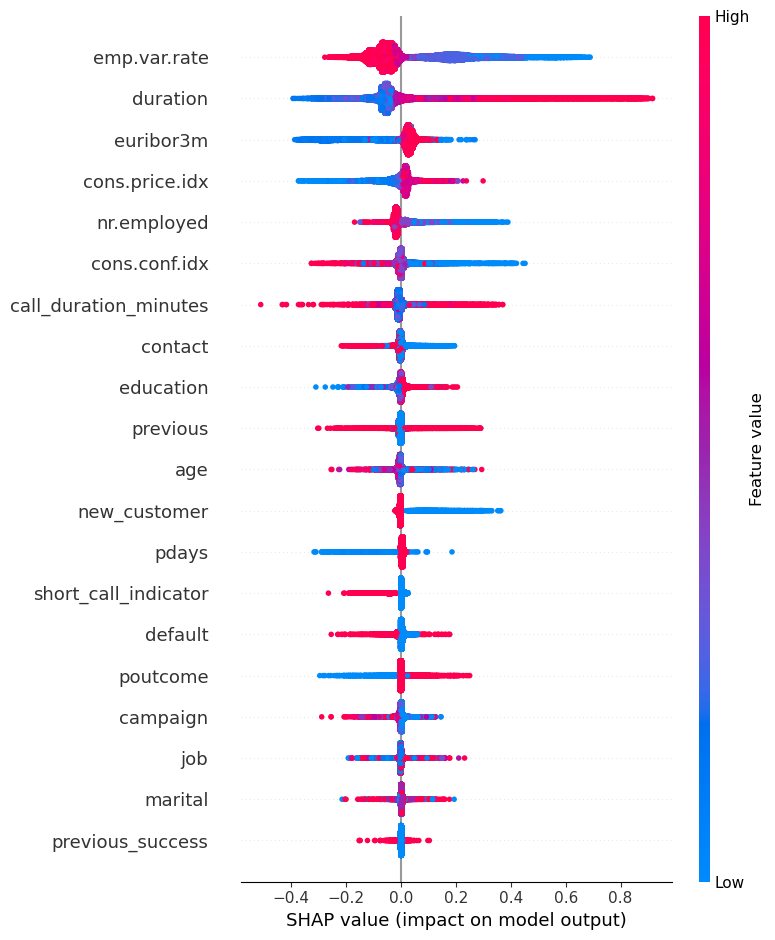

In [416]:
shap.summary_plot(shap_values)

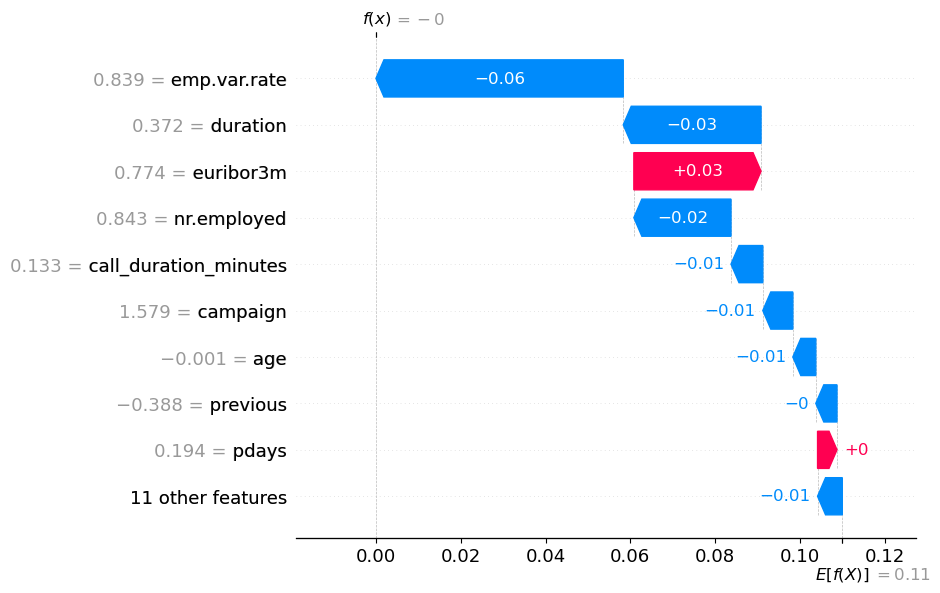

In [418]:
shap.plots.waterfall(shap_values[0])

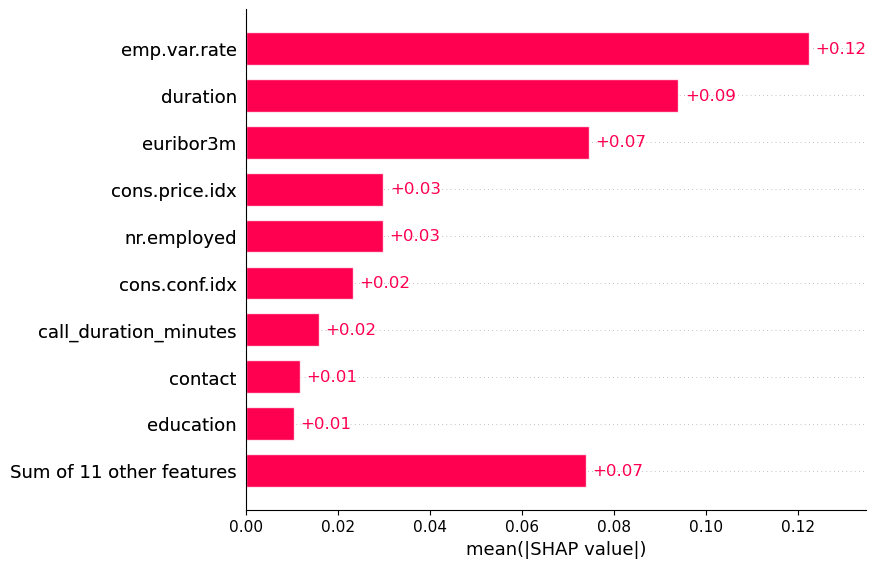

In [420]:
shap.plots.bar(shap_values)

# Key Findings from the SHAP Analysis:

1. Global Feature Importance (Summary and Bar Plots):

Top Influential Features:
- emp.var.rate (Employment Variation Rate): This is the most influential feature, contributing significantly to the model's predictions. A higher employment variation rate negatively impacts the model output, indicating that an increase in this rate likely reduces the probability of a customer subscribing to a term deposit.
- duration (Call Duration): The duration of the call has a strong positive impact on customer response. Longer calls seem to increase the likelihood of a positive outcome, suggesting that more extended interactions may result in successful conversions.
- euribor3m (Euribor 3-Month Rate): This feature has a positive impact, implying that higher Euribor rates are associated with a higher probability of term deposit subscription.
- nr.employed (Number of Employees): This variable has a moderate negative impact, indicating that a larger number of employed individuals correlates with a lower likelihood of a positive response.
- cons.price.idx (Consumer Price Index) and cons.conf.idx (Consumer Confidence Index) have smaller, positive influences on predictions, contributing to the overall decision-making process.

2. Detailed Feature Contributions (Waterfall Plot):

- The waterfall plot provides a local explanation for a single prediction, showing how each feature's SHAP value shifts the base value (expected model output) to the final prediction.
- emp.var.rate and duration show strong opposing influences, with emp.var.rate contributing negatively and duration positively.
- Features like euribor3m and cons.price.idx contribute positively, nudging the prediction towards a positive outcome.
- call_duration_minutes has a small positive contribution, reinforcing that call length plays a role but is less impactful compared to duration and emp.var.rate.

3. Distribution of SHAP Values (Summary Plot):

- The summary plot shows how each feature's SHAP values are distributed across the dataset. The color gradient (blue to red) indicates the feature value (low to high).
- emp.var.rate exhibits a clear pattern where higher values (shown in blue) result in negative impacts on the model output.
- duration is predominantly positive, shown by the SHAP values moving to the right, indicating that longer calls consistently increase the likelihood of a positive response.
- euribor3m and nr.employed show diverse impacts, with some positive and some negative SHAP values depending on their values within individual records.

4. Insights and Implications:
Business Strategy:

- Call Duration: The strong positive impact of call duration suggests that campaigns focusing on longer, more detailed conversations could yield higher subscription rates.
- Economic Indicators: Factors like emp.var.rate and euribor3m being influential suggest that economic conditions play a significant role in customer decision-making. Adjusting marketing strategies to align with favorable economic periods could be beneficial.
- Consumer Metrics: Although cons.price.idx and cons.conf.idx have moderate impacts, they indicate that customer confidence and price index levels are worth monitoring for better-targeted campaigns.